<h2> GENRE PREDICTION USING MACHINE LEARNING AND DEEPLEARNING MODELS.</h2>

* Coding    : `Raiyan Zannat`


<h3> Section 1: Import Data 
    
</h3>
  

<h3> Section 2: Pre-Processing
    </h3>
    
    
<h3> Section 3: Modelling
    </h3>


<h3> Section 4: Evaluation
    </h3>


<h3> Section 5: Testing
    </h3>
    

<div style="background-color: lightblue; padding: 15px; border-radius: 5px; margin-bottom: 10px;">
    <hSection 1: Import Data
    The dataset is available at <a href="https://www.kaggle.com/competitions/nlp-competition-cuet-ete-day-2023">nlp-competition-cuet-ete-day-2023</a>.
    
</div>


# Dataset Description
For this competition, we curated a dataset comprised of around 4.5K book summaries labeled in seven genre categories: 
* Fiction (0), 
* Thriller (1), 
* Childrens-Book (2), 
* Political (3), 
* Science-Fiction (4),
* War (5)
* Motivational (6).


## Files

    train.csv - the training set
    test.csv - the test set
    train_oshin.csv - the cleaned training set
    test_oshin.csv - the cleaned test set

## Columns

    Id - Unique Number
    summary - Bengali book summaries
    Label - Book Genres

<div style="text-align: center;">
    <h2> 1. Import Necessary Libraries</h2>
</div>

In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import the Data
train = pd.read_csv('/kaggle/input/nlp-competition-cuet-ete-day-2023/train.csv')
test = pd.read_csv('/kaggle/input/nlp-competition-cuet-ete-day-2023/test.csv')

In [3]:
train.head()

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3


In [4]:
# Check Value Counts in Each Genre
train.Label.value_counts()

Label
0    1345
1     702
2     498
3     439
4     410
5     297
6     196
Name: count, dtype: int64

In [5]:
gdata = {
    'Genre': ['Fiction', 'Thriller', 'Childrens-Book', 'Political', 'Science-Fiction', 'War', 'Motivational'],
    'Label': [0, 1, 2, 3, 4, 5, 6]
}

genre_df = pd.DataFrame(gdata)

genre_df

,Genre,Label
0,Fiction,0
1,Thriller,1
2,Childrens-Book,2
3,Political,3
4,Science-Fiction,4
5,War,5
6,Motivational,6


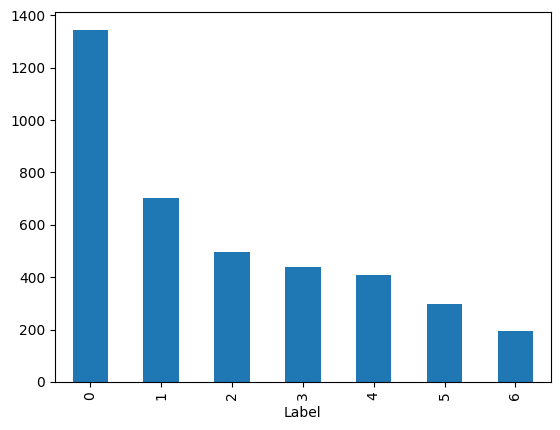

In [6]:
train.Label.value_counts().plot(kind='bar');

<div style="text-align: center;">
    <h3> Check a Random Sample</h3>
</div>

In [7]:
ri = np.random.randint(0, len(train))
train['summary'][ri]

'#রকমারি_পাঠক_সমাগম_বুক_রিভিউ_প্রতিযোগিতা মাসঃ জুলাই সপ্তাহঃ তৃতীয় সপ্তাহ (২১-২৬ জুলাই) পর্বঃ ০১ বইঃ গথ লেখকঃ অৎসুইশি অনুবাদকঃ কৌশিক জামান প্রকাশনীঃ বাতিঘর প্রকাশনী পৃষ্ঠাঃ ২৭০ মুদ্রিত মূল্যঃ ২৮০ টাকা প্রচ্ছদঃ ডিলান প্রথম প্রকাশঃ ফেব্রুয়ারি ২০১৮ ঘরানাঃ সাইকোলজিক্যাল থ্রিলার . ||রিভিউ|| ক্লাসের সবচেয়ে অদ্ভুত মেয়েটির নাম মোরিনো। একেবারে আলাদা ধাচের মেয়েটির তার ক্লাসের এক বন্ধুর সাথে অদ্ভুত রকমের মিল আছে। পুরো বইটিতে এই দুই অদ্ভুত চরিত্রই যেন এক নতুন স্বাদ জুগিয়েছে বইটির। মোরিনো আর তার বন্ধু যেন বিচরণ করেছে অন্য এক জগতে। কি সেই জগত? তাহলে চলুন কিছুটা ধারণা নেওয়া যাক অদ্ভুত এই চরিত্র দুটির বিচরণ করা জগতের সাথে। . নৃশংস ভাবে খুন করা হচ্ছে অল্পবয়সী মেয়েদের। খুনি তার পছন্দসই জায়গায় নিয়ে খুনগুলো করছে। খুন করার পর লাশগুলো নিয়ে যেন শিশুশুলভ খেলা খেলছে খুনি। টুকরো টুকরো করে ফেলছে লাশের শরীর। আর সেই টুকরো টুকরো শরীর বিভিন্ন জায়গায় পেরেক ঠুকে আটকে রাখছে। ক্রাইম স্পটগুলো যেন বিভৎস রূপে ফুটিয়ে তুলতেই খুনির এমন আয়োজন। বিভৎস এ সমস্ত খুনের বর্ণনাগুলো খুনি তার নোটবুকে নিঁখুতভাবে লিখেও রাখছে। আর সেই নো

In [8]:
train.shape

(3887, 3)

In [9]:
train.isna().sum()

summary    1
genre      0
Label      0
dtype: int64

In [10]:
# So there is a Null Value need to remove it
train.dropna(inplace=True)
train.isna().sum()

summary    0
genre      0
Label      0
dtype: int64

In [11]:
test.head()

,Id,summary
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...


In [12]:
test.shape

(687, 2)

In [13]:
print(f'Length OF Training Data = {len(train)}\nLength OF Test Data = {len(test)}')

Length OF Training Data = 3886
Length OF Test Data = 687


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>Check For a Random Summary to Find Noise</h3>
</div>

In [14]:
rand_index = np.random.randint(0, len(train))
print(rand_index)
print(f'Text ={train.summary[rand_index]}')

1599
Text =মানুষ হিশেবে আমার অপরাধসমূহ - হুমায়ুন আজাদ

তারেক নূরুল হাসান

১৷
বইয়ের প্রচ্ছদে হিশেব- বানান এভাবেই দেয়া আছে৷ লেখকের নাম যখন হুমায়ুন আজাদ, এ বানান তখন আর অবাক করেনা আমাকে৷ 
আমার পড়া হুমায়ুন আজাদের প্রথম বই - "সব কিছু ভেঙ্গে পড়ে'৷ মানুষের পারস্পরিক সম্পর্ক নিয়ে লেখা বই৷ সব রকম সম্পর্ক৷ বাবা-মা'র সাথে, ভাই বা বোনের সাথে, স্বামী-স্ত্রী বা পুত্র-কন্যাদের সাথে৷ সে বইয়ের মূল চরিত্র ছিলেন একজন প্রকৌশলী, যিনি সড়ক বানান, আর ব্রীজ৷ মানে সেতু৷ ব্রীজ বানাতে বানাতে একসময় মানুষের সম্পর্কগুলোকেও তিনি ব্রীজ বলে ভাবা শুরু করেন৷ একসময় দেখা যায়, এ সম্পর্কগুলো তার বানানো ব্রীজগুলোর মতই কী অসহায়ভাবে ভেঙ্গে পড়ছে!
বই পড়ে যে কখোনো যন্ত্রনা পাওয়া যায়, হুমায়ুন আজাদের বই পড়ার আগে আমার এই ধারনাই ছিলো না৷ অসম্ভব যন্ত্রনা দেয় তাঁর বই,অথবা বলা ভাল- পীড়া দেয়৷ নিজেকে নিজের মুখোমুখি দাঁড় করায়৷ চারপাশের সোজা সরল জগতের ধারনা এক লহমায় উড়িয়ে দিয়ে তিনি যেন চোখে আঙুল দিয়ে দেখান, কেমন করে আমাদের চারপাশের সব কিছু ভেঙ্গে পড়ছে৷
মানুষ হিশেবে আমার অপরাধসমূহ- স্বীকারোক্তিমূলক বই৷ তাঁর প্রা

In [15]:
noise_list = {
    '\r\n\r\n': ' ',
    '\r\n': ' ',
    '...': ' ',
    '।।।': '।',
    '*****': ' ',
    '.....': ' ',
    '....': ' ',
    '....!!!!': ' ',
    '....!': ' ',
    '\r\n\r\n\r\n\r\n': ' ',
    '\r\n\r\n\r\n': ' ',
    'br': ' ',
    '❤️📖📕': '',
    '….': '',
    '?????': '?',
    '\u200d': ' ',
    'https://www.rokomari.com/book/15184/দ্য-বেষ্ট-লেইড-প্ল্যানস': ' ',
    
}

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>Filter the Dataframe to see these Noises</h3>
</div>

### Train Set

In [16]:
# Found this noise Manually 
train.summary[3152]

'BwZnvm-wbf©i Dcb¨v‡mi eo P¨v‡jÄ BwZnv‡mi PwiÎ‡K Dcb¨v‡mi Q‡K †djv| cÖ_gv cÖKvkb cÖKvwkZ nwiksKi Rj`v‡mi ÔAvwg g„Yvwjbx bBÕ iex›`ªbv‡_i mnawg©bx g„Yvwjbxi AvZ¥K_b| ejv n‡q‡Q, Ôco‡Z wM‡q g‡b n‡e, Dcb¨vm bq, g„Yvwjbxi mwZ¨Kvi AvZ¥¯§„wZ GwU|Õ \r\nAvZ¥¯§„wZ wn‡m‡e Avgiv cÖ_‡gB †nvuPU LvB Gi fvlvixwZ‡Z| †mB mg‡qi KjKvZvi ev eªvþ mgv‡Ri fvlv †bB GLv‡b| †bB feZvwiYxi Rb¥¯’vb h‡kv‡ii fvlvI| (†`Lyb Kvwj cÖmbœ wms‡ni û‡Zvg c¨uvPvi bKkv wKsev mybxj M‡½vcva¨v‡qi cÖ_g Av‡jv)| AvZ¥¯§„wZi X‡O n‡jI †jLK †mLvb †_‡K m‡i G‡m‡Qb evievi| Avjv`v NUbvI ejv n‡q‡Q †jL‡Ki Revbx‡Z|\r\nAvwg eje, iex›`ªbv_ Avi g„Yvwjbxi (Avm‡j feZvwibxi) gvSLv‡bi AbwZµvšÍ `yiZ¡‡K DcRxe¨ K‡i †jLv GB Dcb¨v‡m ¯¿x wn‡m‡e g„Yvwjbxi bv cvIqvi mÜvb Ki‡Z wM‡q iex›`ªbv‡_i Pwi‡Îi `ye©j w`K¸wj‡KB Avwe®‹vi Kiv n‡q‡Q †Kej| ejv hvq g„Yvwjbxi gyL w`‡q Ab¨ GK iex›`ªbv‡_i K_v ejv‡bv n‡q‡Q, Avjv`v Kvwnbx mvRv‡bv nqwb| AwePvi n‡q‡Q Av‡iv A‡bK Pwi‡Îi cÖwZI| g„Yvwjbxi me bv cvIqvi †cQ‡b iex›`ªbv_‡KB Ly‡uR cvIqv mijxKiY g‡b n‡q‡Q| \r\nDcb¨v‡mi fve eRvq

In [17]:
# Drop this Noise
train = train.drop(3152, axis=0)
train = train.reset_index(drop=True)
train.summary[3152]

'#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইয়ের নামঃ থ্রি এ এম লেখকের নামঃ নিক পিরোগ অনুবাদঃ সালমান হক ঘরানারঃ থ্রিলার ব্যক্তিগত রেটিং:-৪.৫/৫ রিভিউঃ চরিত্রের নাম হেনরি বিনস। ভুগছেনও হেনরি বিনস নামক রোগে। কেমন আজব নাম হয়ে গেলো না! অসুখ টাও আজব। হেনরি বিনস দিনের ২৪ ঘন্টা সময়ের মধ্যে মাত্র ১ ঘন্টা জেগে থাকে মাত্র! ভাবুন তো বিষয়টা, একজন মানুষের তিন বেলা খেতেই তো ১ ঘন্টা চলে যায় বলা চলে। আর বাকি কাজ তো পরেই রইলো! যাই হোক এরকম একজন অাজব ব্যক্তি নিয়ে এই গল্পের শুরু। রহস্য তো নাম থেকেই শুরু। থ্রি এ এম নাম কেন হলো? লোকটা রাত তিন টায় জেগে উঠে আর কাটায় কাটায় ৬০ মিনিট জেগে থাকে। তারপর আবারো ঘুমিয়ে যায়। এই মধ্যরাতে জেগে আবার মধ্যরাতেই ঘুম! এই লোকটা আর কিছুতে জড়াতে পরে বলে সম্ভব মনে হয়! কিন্তু এই অসম্ভব কাজটাই হলো। ১ ঘন্টা জেগে থাকা লোকটা জড়িয়ে গেলো এক মহিলার খুনের অভিযোগে। আরো আশ্চর্য জনক কথা হলো, এই খুনের সাথে জড়িয়ে আছেন আমেরিকার প্রেসিডেন্ট! হেনরি কি পারবে তার এই রোগ নিয়ে নিজেকে খুনের অভিযোগ থেকে বাঁচাতে? লেখক পরিচিতিঃ নিক পিরোগ আমেরিকান ঔপন্যাসিক। তার রচিত ১১ টি থ্রিলার বেস্ট সেলার। পড

In [18]:
filt_cond = ["১-৯", 'A-Za-z0-9']

# pattern = r'[।][।]+'  
# pattern = r'❤️'
pattern = r'[A-Za-z]'  

filt = train[train["summary"].str.contains(pattern, regex=True, na=False)]


# filt = filt.reset_index(drop=True)
print(f'Length of the Df = {filt.shape}')

Length of the Df = (810, 3)


In [19]:
filt.head(3)

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
6,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইঃ বোতল ভূত ...,Childrens-Book,2
15,"বুক রিভিউ- ""রিচার্জ Your ডাউন ব্যাটারি"" -ঝংকার...",Motivational,6


In [20]:
filt = filt.assign(Index=lambda x: x.index)
filt = filt.reset_index(drop=True)

filt.head()

,summary,genre,Label,Index
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,0
1,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইঃ বোতল ভূত ...,Childrens-Book,2,6
2,"বুক রিভিউ- ""রিচার্জ Your ডাউন ব্যাটারি"" -ঝংকার...",Motivational,6,15
3,বনি গল্পের শুরু হয় আমেরিকা প্রবাসী এক বাঙালি দ...,Science-Fiction,4,17
4,good really,Fiction,0,24


In [21]:
ind = np.random.randint(0, len(filt))
p = filt.Index[ind]
print(f'Index = {p} Text = ', end = ' ')
filt.summary[ind]

Index = 493 Text =  

'পুঁজিবাদী সমাজব্যবস্থায় প্রান্তিক জনপদের টিকে থাকার লড়াই, প্রেম- ভালবাসা - বিরহের এক কালজয়ী জীবনগাঁথা- "কালচক্র"\r\n\r\n"কালচক্র"  আবদুল্লাহ আল ইমরান এর লেখা দ্বিতীয় উপন্যাস হলেও আমি তাঁর তৃতীয় উপন্যাস \'দিবানিশি\' আগে পড়েছিলাম। \'দিবানিশি\' পড়েই আমি তাঁর লেখার প্রেমে পড়েছিলাম। \r\nএরপর পড়লাম \'কালচক্র\'। উপন্যাসটি পড়ে তরুণ এই কথাসাহিত্যিকের লেখকসত্তার প্রতি আমার মুগ্ধতা আকাশ ছুঁয়েছে।\r\n\r\n\'কালচক্র\' একটি সামাজিক উপন্যাস। \r\nএ উপন্যাসে লেখকের পটভূমি নির্বাচন, পুঁজিবাদী সমাজের সুনিপুন চিত্র অঙ্কন, সমাজের নর-নারীর সম্পর্ক এবং তাদের মনোবিশ্লেষন, রাজনীতিমনস্কতা, জীবন ও দর্শন এবং ভাষার ব্যবহার উপন্যাসটিকে অনন্য মাত্রায় পৌঁছে দিয়েছে। লেখক সমাজ ও সমাজের মধ্যকার মানুষের স্বভাব, চারিত্রিক বৈশিষ্ট্য বিশ্লেষণ করেছেন মার্কসীয় এবং ফ্রয়েডীয় দর্শনের আলোকে। \r\n\r\nউপন্যাসের পটভূমি তৈরি হয়েছে সমাজের প্রান্তিক মানুষ এবং তাদের যাপিত জীবন নিয়ে। প্রান্তিক মানুষের জীবনের এই গল্প উপন্যাসটিকে অত্যন্ত জীবনঘনিষ্ঠ করে তুলেছে। \r\nখুলনার ভৈরব নদীর তীরে নয়নতারা পাটকলকে কেন্দ্র করে উপন্যাসের পটভূমি বিস্তৃত হয়

In [22]:
train['summary'][p], train['genre'][p]

('পুঁজিবাদী সমাজব্যবস্থায় প্রান্তিক জনপদের টিকে থাকার লড়াই, প্রেম- ভালবাসা - বিরহের এক কালজয়ী জীবনগাঁথা- "কালচক্র"\r\n\r\n"কালচক্র"  আবদুল্লাহ আল ইমরান এর লেখা দ্বিতীয় উপন্যাস হলেও আমি তাঁর তৃতীয় উপন্যাস \'দিবানিশি\' আগে পড়েছিলাম। \'দিবানিশি\' পড়েই আমি তাঁর লেখার প্রেমে পড়েছিলাম। \r\nএরপর পড়লাম \'কালচক্র\'। উপন্যাসটি পড়ে তরুণ এই কথাসাহিত্যিকের লেখকসত্তার প্রতি আমার মুগ্ধতা আকাশ ছুঁয়েছে।\r\n\r\n\'কালচক্র\' একটি সামাজিক উপন্যাস। \r\nএ উপন্যাসে লেখকের পটভূমি নির্বাচন, পুঁজিবাদী সমাজের সুনিপুন চিত্র অঙ্কন, সমাজের নর-নারীর সম্পর্ক এবং তাদের মনোবিশ্লেষন, রাজনীতিমনস্কতা, জীবন ও দর্শন এবং ভাষার ব্যবহার উপন্যাসটিকে অনন্য মাত্রায় পৌঁছে দিয়েছে। লেখক সমাজ ও সমাজের মধ্যকার মানুষের স্বভাব, চারিত্রিক বৈশিষ্ট্য বিশ্লেষণ করেছেন মার্কসীয় এবং ফ্রয়েডীয় দর্শনের আলোকে। \r\n\r\nউপন্যাসের পটভূমি তৈরি হয়েছে সমাজের প্রান্তিক মানুষ এবং তাদের যাপিত জীবন নিয়ে। প্রান্তিক মানুষের জীবনের এই গল্প উপন্যাসটিকে অত্যন্ত জীবনঘনিষ্ঠ করে তুলেছে। \r\nখুলনার ভৈরব নদীর তীরে নয়নতারা পাটকলকে কেন্দ্র করে উপন্যাসের পটভূমি বিস্তৃত হ

In [23]:
filt_cond = ["১-৯", 'A-Za-z0-9']

# pattern = r'[।][।]+'  
pattern = r'❤️'
# pattern = r'[A-Za-z]'  

filt = train[train["summary"].str.contains(pattern, regex=True, na=False)]


# filt = filt.reset_index(drop=True)
print(f'Length of the Df = {filt.shape}')

Length of the Df = (4, 3)


In [24]:
filt

,summary,genre,Label
53,#BookReview\r\nবইঃ পল্লীসমাজ\r\nলেখকঃ শরৎচন্দ্...,Fiction,0
2862,এইটা বেষ্ট❤️❤️❤️,Fiction,0
3289,বেষ্ট ওয়ান ❤️,Fiction,0
3654,"প্রিয় রবি ভাই, আপনার উপন্যাস চন্দ্রমুখী নেয়ার ...",Fiction,0


### Test SET

In [25]:
# filt_cond = ["১-৯", 'A-Za-z0-9']

# filt = test[lambda x: x["summary"].str.contains("^[A-Za-z0-9]")]
# # filt = filt.reset_index(drop=True)
# print(f'Length of the Df = {filt.shape}')

filt_cond = ["১-৯", 'A-Za-z0-9']

pattern = r'[।][।]+'  
# pattern = r'❤️'

filt = test[test["summary"].str.contains(pattern, regex=True, na=False)]


# filt = filt.reset_index(drop=True)
print(f'Length of the Df = {filt.shape}')

Length of the Df = (39, 2)


In [26]:
filt = filt.assign(Index = lambda x: x.index)
filt = filt.reset_index(drop=True)
filt.head()

,Id,summary,Index
0,14,সায়রা সায়েন্টিস্ট লেখকঃ মুহম্মদ জাফর ইকবাল মূল...,14
1,16,আসিফ মেহেদীর 'মায়া' বইটি নিয়ে বড় ইচ্ছে হল কিছু...,16
2,27,একটা সময় ছিল যখন লেখক আগে একটা মূল গল্প ভাবতেন...,27
3,43,কোটি টাকার একটা খুনের কন্ট্রাক্ট। কিন্তু সময় খ...,43
4,52,"৪৭টি ছড়া নিয়ে এই ""রাঙা পুতুল চাই"" বইটি অসাধারণ...",52


In [27]:
ind = np.random.randint(0, len(filt))
p = filt.Index[ind]
print(f'Index = {p} Text = {filt.summary[ind]}')

Index = 673 Text = #রহস্যময়_বিজ্ঞান_জগত ও #রকমারি_ডট_কম #বুক_রিভিউ_কনটেস্ট সায়েন্স ফিকশন লেখালেখি তেও হুমায়ুন আহমেদ এর আলাদা একধরনের স্টাইল আছে। তার সাইফাই গুলো শুরু হয় খুব সাধারণ কোন ঘটনা থেকে, আর ঘটনা প্রবাহে সাধারণ ঘটনাটি আসাধারণ এক দৃশ্যপট অবতারণা করে।। . গ্যালাকটিক ইন্টেলিজেন্স এর একজন লোক যখন ইরিনা র বাসায় আসলো তাকে নিষিদ্ধ নগরী তে নিয়ে যেতে, এই সাধারণ দৃশ্য দিয়েই ঘটনাপ্রবাহ এর শুরু। . সাইফাই টি তে দেখা যায়, সারা পৃথিবী কে ধ্বংসের হাত থেকে বাঁচিয়ে নিষিদ্ধ নগরী থেকে কিছু অমর সায়েন্টিস্ট পৃথিবী নিয়ন্ত্রন করেন। তারা পৃথিবীকে তিনটি স্তরে ভাগ করে দিয়েছেন।। . কিন্তু এত সুন্দর ব্যবস্থায় হঠাত করে তৃতীয় স্তর থেকে, মানুষ নেয়া হচ্ছে নিষিদ্ধ নগরী তে। . ইরিনার মতো সাধারণ একজন, হঠাৎ গুরুত্ববহ হয়ে উঠলো নিষিদ্ধ নগরীর নাগরিক দের কাছে। . মীর এর মতো তুখোড় বুদ্ধিমান মানুষ এর কার্ডে এ কেন তেতাল্লিশ টি দাগ? কেনই বা তাকে মৃত্যুদণ্ড না দিয়ে ডাকা হলো নিষিদ্ধ নগরী তে?? . রোবট রা কি তাদের মূলনীতি থেকে সরে যাচ্ছে? তারা কি তাদের ভেতর মানবিক আবেগ আনতে চাচ্ছে?তারা কি চায় মানুষদের শাসন করতে? 

<div style="background-color: lightgreen; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

<h2> Section 2: Pre-Processing
    </h2>
<ol>
    <li>Cleaning Process</li>
    <li>Translate English to Bangla</li>
    <li>EDA in summary Length</li>
    <li>Remove Stop Words</li>
    <li>Remove Punctuations</li>
</ol>
</div>

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>2.1 Cleaning Process</h3>
</div>

In [28]:
def clean_emoji(text):
    cleaned_text = re.sub('[^a-zA-z\u0980-\u09FF,./!?$%&"\'\\-_;:।]'," ",text)
    return cleaned_text

#main Data Cleaning function
def clean_data(text):
    cleaned_text = re.sub('[^a-zA-Z0-9\u0980-\u09FF,./!?$%&"\'\\-_;।]'," ",text) #remove unusual symbols such as emoji : # % @ * + etc 
    cleaned_text = re.sub('(?<=[\s][^\u0980-\u09FFa-zA-Z0-9])[^\u0980-\u09FFA-Za-z0-9]+',"", cleaned_text) #remove multiples punctuations after space(doesnt remove the space)
    cleaned_text = re.sub('(?<=[^\u0980-\u09FFa-zA-Z\s0-9])[^\u0980-\u09FFA-Za-z0-9]'," ", cleaned_text) #remove multiple punctuations just keeps the first one(no space before the punctuation)
    cleaned_text = re.sub('\s(?=[।,.?!;])',"", cleaned_text) #remove the space before the punctuatuion mark
    cleaned_text = ' '.join(cleaned_text.split()) #removes multiple spaces keeps only one 
    cleaned_text = re.sub(r'([।,.?!;])(?=[\u0980-\u09E5a-zA-Z0-9\u09F0-\u09FF])',r'\1 ', cleaned_text) #Make data standardized like there will e a space after a punctuation
    cleaned_text = re.sub('(?<=[\u0980-\u09E5\u09F0-\u09FF])[.][\s](?=[\u0980-\u09E5\u09F0-\u09FF])',' ', cleaned_text) #removes . from bangla text except from bangla digits
   
    return cleaned_text

#main Data Cleaning function-2
def clean(text):
    '''
    Takes a summary as input and return it's clean version.
    
    args:
    text: a summary containing noise.
    '''
    text=text.replace('\n',"")
    text=text.replace('\r',"")
    text=re.sub(r'https?://\S+|www\.\S+',' ',text)
    cleaned_text = re.sub('[^a-zA-Z0-9\u0980-\u09FF,./!?$%&"\'\\-_;।]'," ",text) #remove unusual symbols such as emoji : # % @ * + etc 
    cleaned_text = re.sub('(?<=[\s][^\u0980-\u09FFa-zA-Z0-9])[^\u0980-\u09FFA-Za-z0-9]+',"", cleaned_text) #remove multiples punctuations after space(doesnt remove the space)
    cleaned_text = re.sub('(?<=[^\u0980-\u09FFa-zA-Z\s0-9])[^\u0980-\u09FFA-Za-z0-9]'," ", cleaned_text) #remove multiple punctuations just keeps the first one(no space before the punctuation)
    cleaned_text = re.sub('\s(?=[।,.?!;])',"", cleaned_text) #remove the space before the punctuatuion mark
    cleaned_text = ' '.join(cleaned_text.split()) #removes multiple spaces keeps only one 
    cleaned_text = re.sub(r'([।,.?!;])(?=[\u0980-\u09E5a-zA-Z0-9\u09F0-\u09FF])',r'\1 ', cleaned_text) #Make data standardized like there will e a space after a punctuation
    cleaned_text = re.sub('(?<=[\u0980-\u09E5\u09F0-\u09FF])[.][\s](?=[\u0980-\u09E5\u09F0-\u09FF])',' ', cleaned_text) #removes . from bangla text except from bangla digits
   
    return cleaned_text


In [29]:
# clean trian and test both
tqdm.pandas()
train['text'] = train.summary.progress_apply(clean)
test['text'] = test.summary.progress_apply(clean)

100%|██████████| 687/687 [00:00<00:00, 1397.24it/s]


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>2.2 Translate English To Bangla</h3>
</div>

In [30]:
!pip install transformers
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency information for hstspreload from https://files.pythonhosted.org/packages/b5/9f/83329ebd2808e04f2564051e4c4a880a1e2e67bd6410899f728096d0e22f/hstspreload-2024.2.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=5c8649c70291eb137424c47ba07dcf47eb43f387db397504088388b05661c401
  Stored in directory: /root

In [31]:
def final_clean(text):
    """
    Cleans the input text by removing single quotes, English letters, and digits.
    Translates the text to Bengali if the whole summary is written in English.

    Parameters:
    - text (str): The input text to be processed.

    Returns:
    str: The translated text.
    """
    text=re.sub("'","",text)
    pattern = r'[a-zA-Z0-9]'
    
    if re.match(pattern, text):
        if re.search(r'[ক-হ]', text):
            text = re.sub(pattern, " ", text)
        else:
            text = translate_to_bengali(text)
            text = re.sub(pattern, " ", text)
    
    return text

In [32]:
from googletrans import Translator

def translate_to_bengali(text):
    """
    Translates the text to Bengali to English.

    Args:
    - text (str): The input text to be processed.

    Returns:
    str: The translated text.
    """
    translator = Translator()
    translation = translator.translate(text, src='en', dest='bn')
    return translation.text


def ultimate_translator(text):
    """
    Translates the text to Bengali if the whole summary is written in English or 
    in mix of Bangla-English-Banglish.

    Args:
    - text (str): The input text to be processed.

    Returns:
    str: The translated text.
    """
    flag = re.search('[a-zA-Z0-9]+',text)
    if flag is not None: #is there is english word in the text
        flag1 = re.search('[\u0980-\u09FF]+',text)
        if flag1 is None: # only english so direct translate
            return translate_to_bengali(text)
        else: #mix of bangla and english
            converted = ""
            for words in text.split():
                flag3 = re.search('[a-zA-Z0-9]',str(words))
                if flag3 is not None: # the word is english so translate
                    converted += translate_to_bengali(words)
                    converted +=' '
                else: # the word is bangla direct add
                    converted += words
                    converted +=' '
            return converted
    else: #no english text  
        return text         
            
        
def is_english(sentence):
    if re.search(f'[a-zA-Z0-9]',sentence):
        return True
    else:
        return False
    
def translate_english(text):
    """
    Translates the text to Bengali if the whole summary is written in English or 
    in mix of Bangla-English-Banglish.

    Args:
    - text (str): The input text to be processed.

    Returns:
    str: The translated text.
    """
    re.sub(r"'", '',text)
    split_text = text.split(' ')
   

    translated_text = []
    i = 0

    while i < len(split_text):
        if is_english(split_text[i]):
            temp = ""
            j=i
            while j<len(split_text):
                if is_english(split_text[j]):
                    temp += " " + split_text[j]
                    
                else:
                    i = j-1
                    break
                j+=1
                         # Translate the English words
            i=j-1
            translated_word = translate_to_bengali(temp.strip())
            translated_text.append(translated_word)
        else:
            translated_text.append(split_text[i])

        i += 1

    return ' '.join(translated_text)

In [34]:
# Apply Considering Converting Mixer Of Bangla English

#train['text']=train['text'].progress_apply(translate_english)
#test['text']=test['text'].progress_apply(translate_english)

 37%|███▋      | 1445/3885 [05:18<08:58,  4.53it/s]  


ReadTimeout: The read operation timed out

In [ ]:
# Apply Considering Converting Mixer Of Bangla English
# train['text']=train['text'].progress_apply(ultimate_translator)
# test['text']=test['text'].progress_apply(ultimate_translator)

In [ ]:
# # Apply Considering Removing Mixer Of Bangla English
# train['text'] = train['text'].progress_apply(final_clean)
# test['text'] = test['text'].progress_apply(final_clean)

In [35]:
train.head()

,summary,genre,Label,text
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...


In [36]:
test.head()

,Id,summary,text
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>Compare Translated Text and Main Text</h3>
</div>

In [37]:
filt_cond = ["১-৯", 'A-Za-z0-9']

pattern = r'[A-Za-z]'  
# pattern = r'❤️'

filt = test[test["summary"].str.contains(pattern, regex=True, na=False)]


filt = filt.reset_index(drop=True)
print(f'Length of the Df = {filt.shape}')

Length of the Df = (138, 3)


In [38]:
filt.head(2)

,Id,summary,text
0,5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বই:আর্কন লেখক...,রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বই আর্কন লেখক ...
1,6,পক্ষপাতিপূর্ণ বই। লেখক অনেক কষ্টকরে জিন্নাহক...,পক্ষপাতিপূর্ণ বই। লেখক অনেক কষ্টকরে জিন্নাহকে ...


In [39]:
# uncomment as necessary

# ri = random.randint(0, len(filt))
ri = 129
# ri = 28
print(ri)

print(f'Cleaned = {filt.text[ri]}')
print(f'OG Text = ')
filt.summary[ri]

129
Cleaned = Recently I have reviewed the novel of Mostafa Sohel titled Neta. In this Novel we found a leader named Mukit Hasan who lacks character or integrity. It doesn t matter how intelligent, affable, persuasive, or savvy a person is, if he is prone to rationalizing unethical behavior based upon current or future needs, he will eventually fall prey to their own undoing. Optics over ethics is not a formula for success. Though nobody is perfect, but leaders who consistently fail are not leaders, no matter how much you wish they were. While past performance is not always a certain indicator of future events, a long-term track record of success should not be taken lightly. Someone who has consistently experienced success in leadership roles has a much better chance of success than someone who has not. This is the main theme of Neta which almost every reader would love to read. On the other hand, the writer bring another good leader named Syed Ali in the novel who is very popular amon

'Recently I have reviewed the novel of Mostafa Sohel titled ‘Neta’. In this Novel we found a leader named Mukit Hasan who lacks character or integrity. It doesn’t matter how intelligent, affable, persuasive, or savvy a person is, if he is prone to rationalizing unethical behavior based upon current or future needs, he will eventually fall prey to their own undoing. Optics over ethics is not a formula for success.\r\n Though nobody is perfect, but leaders who consistently fail are not leaders, no matter how much you wish they were. While past performance is not always a certain indicator of future events, a long-term track record of success should not be taken lightly. Someone who has consistently experienced success in leadership roles has a much better chance of success than someone who has not. This is the main theme of Neta which almost every reader would love to read. \r\n\r\n On the other hand, the writer bring another good leader named Syed Ali in the novel who is very popular am


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>2.3 EDA in summary length</h3>
</div>

In [40]:
train['length'] = [len(x.split()) for x in train['text']]
train['length2'] = [len(x.split()) for x in train['summary']]


test['length'] = [len(x.split()) for x in test['text']]
test['length2'] = [len(x.split()) for x in test['summary']]


In [41]:
train.head()

,summary,genre,Label,text,length,length2
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,627,676
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,67,67
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,213,214
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,380,380
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,13,13


In [42]:
test.head(3)

,Id,summary,text,length,length2
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,367,369
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,438,440
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,98,96


In [43]:
print('Training summary Length \n',train.length.describe(),end='\n\n')
print('Test summary Length\n',test.length.describe())

Training summary Length 
 count    3885.000000
mean      311.757529
std       258.804886
min         0.000000
25%       143.000000
50%       260.000000
75%       420.000000
max      4289.000000
Name: length, dtype: float64

Test summary Length
 count     687.000000
mean      307.739447
std       261.802304
min         1.000000
25%       141.000000
50%       254.000000
75%       397.000000
max      2495.000000
Name: length, dtype: float64


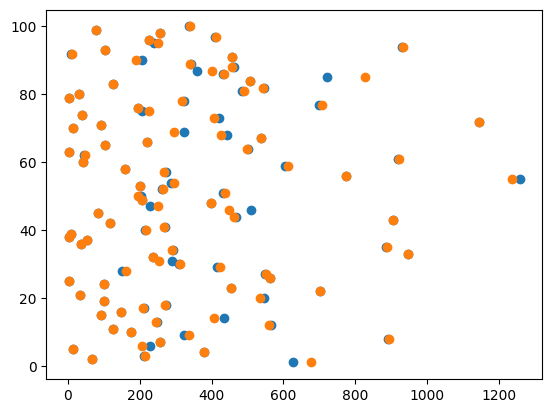

In [44]:
x1 = list(train.length[:100])
x2 = list(train.length2[:100])
plt.scatter(x1, np.arange(1, 101));
plt.scatter(x2, np.arange(1, 101));

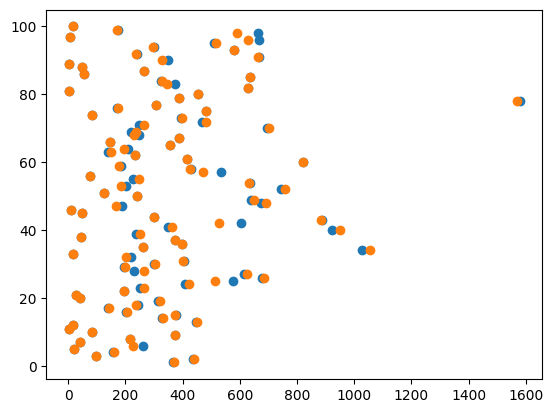

In [45]:
x1 = list(test.length[:100])
x2 = list(test.length2[:100])
plt.scatter(x1, np.arange(1, 101));
plt.scatter(x2, np.arange(1, 101));

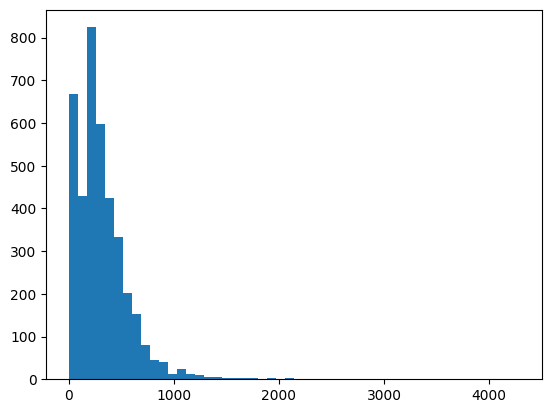

In [46]:
plt.hist(train['length'],bins=50);

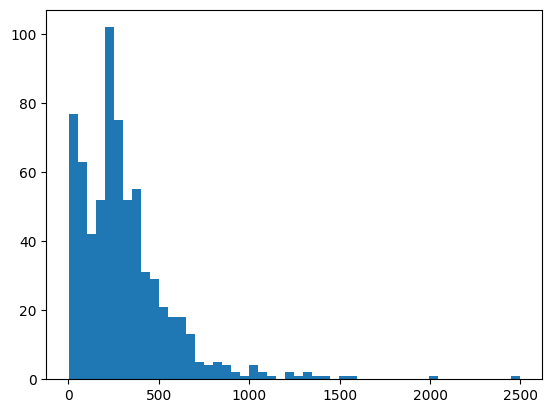

In [47]:
plt.hist(test['length'],bins=50);

In [48]:
filt = train[train['length']<=20]
filt.head(2)

,summary,genre,Label,text,length,length2
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,13,13
24,good really,Fiction,0,good really,2,2


In [49]:
print(filt.shape)

(254, 6)


In [50]:
# Noise cleaned Version
N = 10
txts = list(filt.text)
for i in range(N):
    print(txts[i], end='\n-------------------------------------------------------\n')

ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনিস বারবার কপি পেস্ট করা।
-------------------------------------------------------
good really
-------------------------------------------------------
it is very good
-------------------------------------------------------
When this book will available in your stock
-------------------------------------------------------
my book
-------------------------------------------------------
শেষ না করে উঠতে পারলাম না। অসম্ভব মেশানো সব ভালো লাগা এবং ভালোবাসা। আমি মন্ত্রমুগ্ধ!
-------------------------------------------------------
বইটি মোটামুটি ভাল
-------------------------------------------------------
Ami banglali-der bolchi, Ai boi poro. Nijer jat chino.
-------------------------------------------------------
বইটা বাংলায় নাই?
-------------------------------------------------------
মন ভালো করে দেয়ার জন্য যথেষ্ট। পুরোটা পড়লে মনে হবে সিনেমা দেখছি।
-------------------------------------------------------


In [51]:
# Noisy Version
N = 10
txts = list(filt.summary)
for i in range(N):
    print(txts[i], end='\n------------------------------------------------------\n')

ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনিস বারবার কপি পেস্ট করা।
------------------------------------------------------
good really
------------------------------------------------------
it is very good
------------------------------------------------------
When this book will available in your stock
------------------------------------------------------
my book
------------------------------------------------------
শেষ না করে উঠতে পারলাম না। অসম্ভব মেশানো সব ভালো লাগা এবং ভালোবাসা। আমি মন্ত্রমুগ্ধ!!
------------------------------------------------------
বইটি মোটামুটি ভাল
------------------------------------------------------
Ami banglali-der bolchi, Ai boi poro ... Nijer jat chino.
------------------------------------------------------
বইটা বাংলায় নাই?
------------------------------------------------------
মন ভালো করে দেয়ার জন্য যথেষ্ট। পুরোটা পড়লে মনে হবে সিনেমা দেখছি।
------------------------------------------------------


### Now for Test Set

In [52]:
filt = test[test['length']<=20]
filt.head(2)

,Id,summary,text,length,length2
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...,20,19
10,10,very interesting,very interesting,2,2


In [53]:
filt.shape

(41, 5)

In [54]:
# Noise cleaned Version
N = 10
txts = list(filt.text)
for i in range(N):
    print(txts[i], end='\n-------------------\n')

অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিবারের সুখ, দু খ, আনন্দ, কষ্ট নিয়ে লেখা একটি বই ভালো লাগবে সবারই।
-------------------
very interesting
-------------------
ai uponnas ta ami porechi, humayun sir jotharthoi choritro guli futiye tulecen, sundhor rumantic akta uponnas.
-------------------
বইটি পড়ে অনেক ভালো লাগলো। বিচারপতি মুহাম্মদ হাবিবুর রহমান স্যারের লেখা পড়া মানেই নতুন কিছু জানা এবং শেখা।
-------------------
amr life e pora shera boi gular moddhe ekta
-------------------
Vlo boi.
-------------------
very interesting book
-------------------
অনেক বানান ভুল, টাইপিং মিসটেক।
-------------------
A must read book if you want to know the history of our liberation war. stories behind.
-------------------
Good Try
-------------------


In [55]:
# Noisy Version
N = 10
txts = list(filt.summary)
for i in range(N):
    print(txts[i], end='\n-------------------\n')

অনেক সুন্দর এবং অসাধারণ একটি বই....  মধ্যবিত্ত পরিবারের সুখ, দু:খ, আনন্দ, কষ্ট নিয়ে লেখা একটি বই.. ভালো লাগবে সবারই।
-------------------
very interesting
-------------------
ai uponnas ta ami porechi, humayun sir jotharthoi choritro guli futiye tulecen, sundhor rumantic akta uponnas.
-------------------
বইটি পড়ে অনেক ভালো লাগলো। বিচারপতি মুহাম্মদ হাবিবুর রহমান স্যারের লেখা পড়া মানেই নতুন কিছু জানা এবং শেখা।
-------------------
amr life e pora shera boi gular moddhe ekta
-------------------
Vlo boi..
-------------------
very interesting book
-------------------
অনেক বানান ভুল, টাইপিং মিসটেক।
-------------------
A must read book if you want to know the history of our liberation war. stories behind....
-------------------
Good Try
-------------------


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h4> So these are the noise in the datatset that are hard to predict.</h4>
</div>

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>2.4 Remove Punctuations </h3>
</div>

In [56]:
def remove_punctuations(sentence):
    '''
    Removes punctuations from the dataset
    '''
    # Remove punctuation
    punctuation_marks = string.punctuation + '।' 
    sentence = sentence.translate(str.maketrans('', '', punctuation_marks))
    
    # Remove extra spaces and newlines
    sentence = ' '.join(sentence.split())
    return sentence


In [57]:
train.head(2)

,summary,genre,Label,text,length,length2
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,627,676
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,67,67


In [58]:
test.head(3)

,Id,summary,text,length,length2
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,367,369
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,438,440
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,98,96


In [59]:
train['wptext'] = train['text'].progress_apply(remove_punctuations)
test['wptext'] = test['text'].progress_apply(remove_punctuations)

100%|██████████| 687/687 [00:00<00:00, 4882.63it/s]


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>Compare Without Punctuation Text and Main Text</h3>
</div>

In [60]:
ri = np.random.randint(0, len(test))
print(test.text[ri])
print(test.wptext[ri])

মওদুদ আহমদ, ব্যারিস্টার, বাংলাদেশ সরকারের একজন সিনিয়র মন্ত্রী এবং বর্তমানে আইন, বিচার ও সংসদ বিষয়ক মন্ত্রণালয়ের দায়িত্বে নিয়োজিত আছেন। এর আগে তিনি রাষ্ট্রপতি জিয়াউর রহমানের সরকারের উপ-প্রধানমন্ত্রী ছিলেন। তিনি বাংলাদেশ সরকারের প্রধানমন্ত্রী ও উপ-রাষ্ট্রপতি পদেও দায়িত্ব পালন করেছেন। একজন দক্ষ পার্লামেন্টারিয়ান হিসেবে তাঁর খ্যাতি সর্বজনবিদিত। বাংলাদেশের সমকালীন রাজনীতিতে তিনি যেমন প্রজ্ঞার পরিচয় রেখেছেন, তেমনি দেশীয় ও আন্তর্জাতিক রাজনীতি সম্পর্কে নিয়মিত লিখে চলেছেন। বঙ্গবন্ধুকে নিয়ে লেখা বইটিতে শেখ মুজিবের সাড়ে তিন বছরের শাসনামলের তুলনামূলক চিত্র তুলে ধরা হয়েছে। বঙ্গবন্ধুকে নিয়ে পৃথক একটি চ্যাপ্টার রয়েছে। নতুন প্রজম্ন বইটিতে অনেক সত্য ইতিহাস জানতে পারবে বলেও জানান ব্যারিস্টার মওদুদ। বাংলাদেশের গণতন্ত্র নামে বইটিতে দুই মেয়াদে বিএনপি সরকার ও এক মেয়াদে আওয়ামী লীগ সরকারের শাসনামলের তুলনামূলক চিত্র তুলে ধরা নতুন প্রজম্মের অনেকেরই বাংলাদেশের ইতিহাস সম্পর্কে স্পষ্ট ধারণা নেই। আমার বইগুলো পড়লে নতুন প্রজম্নসহ সবাই সত্য ইতিহাস জানতে পারবে বলে আমার বিশ্বাস। জানা যায়, ব্যারিস্টার মওদুদ আহ

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>2.5 Remove Stop words </h3>
</div>

In [61]:
def remove_bangla_stop_words(text, bangla_stop_words):
    # Tokenize the text
    words = text.split()
    
    # Remove stop words
    filtered_words = [word for word in words if word not in bangla_stop_words]
    
    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
dataset = list(train.text)
dataset[22]

"মুহম্মদ জাফর ইকবালের কাছ থেকে এ পর্যন্ত আমরা বেশ অনেকগুলোই ভৌতিক ছোটগল্প পেয়েছি। ভূত প্রেত বা আদিভৌতিক বিষয়ের ওপর স্যারের খুব বেশি উপন্যাস না থাকলেও, বিজ্ঞান বিষয়ক এই লেখক এক সময় নিয়মিতভাবেই প্যারানরমাল নানা ঘটনার ওপর ভিত্তি করে ছোটগল্প লিখেছেন। সেরকমই ৯টি ছোটগল্প নিয়ে সাজানো হয়েছে 'পিশাচিনী' নামক স্যারের এই ভৌতিক গল্পের সংকলনটি। প্রতিটি গল্পই যে অসাধারণ, দারুণ ভয়ের এবং শিহরণ জাগানিয়া -এমন কথা বললে তা অবশ্যই অসত্য কথা হয়ে যাবে। কয়েকটি ভাল গল্পের পাশাপাশি কিছু কমজোরি গল্পের মিশেলে এই সংকলন। তবে লক্ষণীয় যে, একই প্রেক্ষাপটে বা একই ধাঁচের একাধিক গল্প একটাও নেই এই বইতে। প্রতিটি গল্পই সম্পূর্ণ ভিন্ন ধারার। একটার সাথে আরেকটার খুব কাছাকাছি কোন মিল পাওয়া যাবে না। কোন গল্পের প্রেক্ষাপট যেখানে বাংলাদেশের কোন একটা অনুন্নত গ্রাম আর কুসংস্কারাচ্ছন্ন মানুষকে ঘিরে, তেমনই কোন কোন গল্প আবার আমেরিকার মত দেশের শিক্ষিত মানুষকে কেন্দ্র করে তৈরি করেছেন লেখক। সর্বাগ্রে বলতে হয় এই বইয়ের প্রথম গল্পের কথা। পিশাচিনী, যার নামানুসারে এই বইয়েরও নামকরণ হয়েছে। পিশাচিনী সম্ভবত এই সংকলনের সেরা গল্প। মিসির আলীর কাহিনীর 

In [88]:
all_words = [word for sentence in dataset for word in sentence.split()]
word_freq = FreqDist(all_words)

In [89]:
word_freq

FreqDist({'train': 1, 'validation': 1})

In [65]:
wf_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
wf_df = wf_df.sort_values(by='Frequency', ascending=False)
wf_df

,Word,Frequency
49,তার,12033
169,এই,11863
268,করে,9528
38,আর,8821
11,এক,7660
...,...,...
29378,পত্রে।,1
29376,ঘারাণার,1
29374,লিখেছিলেন-,1
29371,চিত্তবাবুকে,1


In [66]:
wf_df[:20]

,Word,Frequency
49,তার,12033
169,এই,11863
268,করে,9528
38,আর,8821
11,এক,7660
164,ও,6573
149,থেকে,6136
85,কিন্তু,6085
69,সে,5749
418,এবং,5688


In [67]:
# Set a threshold
threshold = 2000
# Identify high-frequency words
stop_words = [word for word, freq in word_freq.items() if freq > threshold]  


print("Bangla Stop Words:", stop_words)

Bangla Stop Words: ['এক', 'এ', 'করা', 'সাথে', 'আর', 'তাকে', 'তার', 'ভালো', 'একটা', 'করতে', 'সে', 'কিন্তু', 'যে', 'তাদের', 'একটি', 'থেকে', 'ও', 'এই', 'সেই', 'কোন', 'করে', 'একজন', 'এর', 'না', 'তারা', 'কথা', 'তিনি', 'না।', 'আছে', 'পর', 'এবং', 'কিছু', 'শেষ', 'কি', 'বই', 'আমার', 'অনেক', 'আমি', 'সব', 'নিয়ে', 'তা', 'হয়', 'পড়ে', 'হয়ে', 'যায়', 'খুব', 'কাছে', 'তবে', 'লেখক', 'বইটি', 'মনে', 'প্রথম', 'জন্য', 'শুরু']


In [68]:
train['wswtext'] = train.text.progress_apply(remove_bangla_stop_words, bangla_stop_words=stop_words)
test['wswtext'] = test.text.progress_apply(remove_bangla_stop_words, bangla_stop_words=stop_words)

100%|██████████| 687/687 [00:00<00:00, 3750.46it/s]


<div style="background-color: lightgreen; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

<h3>Section 3: Modeling</h3>

<ol>
    <li>Data Division</li>
    <li>Select The Model</li>
    <li>Train the Pretrained Model</li>
</ol>

</div>



<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>3.1 Data Division </h3>
</div>

In [69]:
train.head(2)

,summary,genre,Label,text,length,length2,wptext,wswtext
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,627,676,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,67,67,বেশির ভাগ বই ই আমার ভাললাগে কিন্তু এই টাইপের ব...,বেশির ভাগ ই ভাললাগে। টাইপের এটাই ফার্স্ট পড়লাম...


In [70]:
# Remove small summaries
print(f'Before Removing Shape = {train.shape}')
new_train = train[train['length']>=20].copy()
print(f'After Removing Shape = {new_train.shape}')

Before Removing Shape = (3885, 8)
After Removing Shape = (3641, 8)


In [71]:
# Remove very large summaries
print(f'Before Removing Shape = {new_train.shape}')
new_train = new_train[new_train['length']<=4020].copy()
print(f'After Removing Shape = {new_train.shape}')

Before Removing Shape = (3641, 8)
After Removing Shape = (3640, 8)


In [72]:
new_train.head()

,summary,genre,Label,text,length,length2,wptext,wswtext
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,627,676,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,67,67,বেশির ভাগ বই ই আমার ভাললাগে কিন্তু এই টাইপের ব...,বেশির ভাগ ই ভাললাগে। টাইপের এটাই ফার্স্ট পড়লাম...
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,213,214,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,মিসির আলি এখন ছাত্র ফারুকের শ্বশুর বাড়ি কইলাটি...
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,380,380,ছোটজাতের ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরক...,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...
5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা।\r\n বইয়ের না...,Fiction,0,রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা। বইয়ের নামঃ আর...,229,205,রকমারিবইপোকারিভিউপ্রতিযোগিতা বইয়ের নামঃ আর কতদ...,রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা। বইয়ের নামঃ কত...


* text --> cleaned text
* wptext --> without punctuation text
* wswtext --> removing stop-words text

**Choose any of these for experimentation**

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h4> Save the cleaned Dataframe so that we don't need to make all these steps again.</h4>
</div>

In [73]:
new_train.to_csv('oshin_train.csv', index=False)
test.to_csv('oshin_test.csv', index=False)

<div style="text-align: center; background-color: lightblue; padding: 20px;">
    <h4>Option1. Run All the cells above and use the dataframe.</h4>
</div>

In [74]:
# choosing cleaned text
data = new_train[['text', 'Label']].copy()
data.rename(columns={'Label': 'label'}, inplace=True)
data.head(2)

,text,label
0,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,0


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h4>Option2. Directly Load from the saved and cleaned dataframe.</h4>
 This is saved in a new dataset uploaded in kaggle named `genre clean`
</div>


In [75]:
n_train = pd.read_csv('/kaggle/input/genre-clean/train_oshin.csv')
n_test = pd.read_csv('/kaggle/input/genre-clean/test_oshin.csv')

In [76]:
n_train.head(2)

,summary,genre,Label,summary2
0,BookReviewবইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলে...,Childrens-Book,2,বুকেরভিউ বইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলেখ...
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...


In [77]:
n_test.head(2)

,Id,summary,summary2
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...


In [78]:
n_train['length'] = [len(x.split()) for x in n_train['summary2']]
print(n_train.shape)
n_train = n_train[n_train['length']>=20].copy()
print(n_train.shape)

(3791, 5)
(3636, 5)


In [79]:
data = n_train[['summary2', 'Label']].copy()
data.rename(columns={'summary2':'text', 'Label': 'label'}, inplace=True)

# data = train[['text', 'Label']].copy()
# data.rename(columns={'Label': 'label'}, inplace=True)

data.head(3)

,text,label
0,বুকেরভিউ বইঃ চাঁদের পাহাড়ধরনঃ অ্যাডভেঞ্চারলেখ...,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,0


In [80]:
def plot_rate(df):
    df.label.value_counts().plot(kind='bar', cmap='viridis', title='Types of Genres');

In [82]:
from sklearn.model_selection import train_test_split 

np.random.seed(72)

train_df, valid_df = train_test_split(data, test_size=0.05)

len(train_df), len(valid_df)

(3454, 182)

In [83]:
from datasets import Dataset,DatasetDict
dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(valid_df)
    })


/opt/conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [84]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 3454
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 182
    })
})

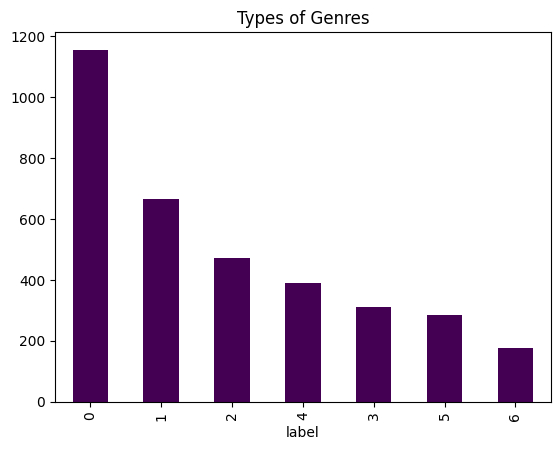

In [85]:
plot_rate(train_df)

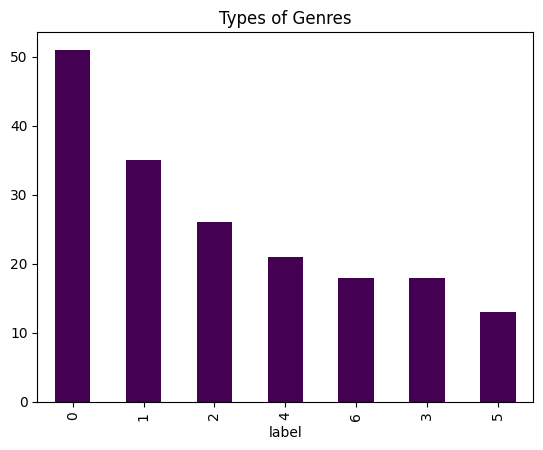

In [86]:
plot_rate(valid_df)



<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>3.2 Select Model </h3>
    This time I chose Bangla BERT from BUET.
</div>

In [90]:
# model_path = 'csebuetnlp/banglabert'
# model_path = 'sagorsarkar/bangla_bert_base'


from transformers import BertTokenizer, TFBertModel,AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('csebuetnlp/banglabert')

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True, max_length=512)

tokenized_data = dataset.map(preprocess_function, batched=True)


  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [91]:
tokenized_data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3454
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 182
    })
})

In [92]:
from transformers import DataCollatorWithPadding
# import evaluate
# accuracy=evaluate.load("accuracy")


data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

In [93]:
id2label = {0:0,1:1,2:2, 3:3, 4:4, 5:5, 6:6}
label2id = {0:0,1:1,2:2, 3:3, 4:4, 5:5, 6:6}

from transformers import create_optimizer
import tensorflow as tf
batch_size=2
num_epochs=4
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=1e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

In [94]:
from transformers import TFAutoModelForSequenceClassification
model=TFAutoModelForSequenceClassification.from_pretrained(
    'csebuetnlp/banglabert',num_labels=7,id2label=id2label,
    label2id=label2id,ignore_mismatched_sizes=True, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraForSequenceClassification: ['electra.embeddings.position_ids', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing TFElectraForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFElectraForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dens

In [95]:
np.object = object

tf_train_set = model.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=4,
    collate_fn=data_collator,
)


tf_validation_set = model.prepare_tf_dataset(
    tokenized_data["validation"],
    shuffle=False,
    batch_size=4,
    collate_fn=data_collator,
)

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [96]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [97]:
print(model.config)

ElectraConfig {
  "_name_or_path": "csebuetnlp/banglabert",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "transformers_version": "4.35.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}



<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3>3.3 Train The Model.</h3>
</div>

In [99]:
num_epoch = 4

history = model.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=num_epoch)

Epoch 1/4
863/863 [==============================] - 286s 331ms/step - loss: 0.5180 - accuracy: 0.8291 - val_loss: 0.6328 - val_accuracy: 0.8022
Epoch 2/4
863/863 [==============================] - 278s 322ms/step - loss: 0.3543 - accuracy: 0.8946 - val_loss: 0.6250 - val_accuracy: 0.8516
Epoch 3/4
863/863 [==============================] - 276s 320ms/step - loss: 0.2771 - accuracy: 0.9238 - val_loss: 0.6296 - val_accuracy: 0.8187
Epoch 4/4
863/863 [==============================] - 275s 319ms/step - loss: 0.2248 - accuracy: 0.9331 - val_loss: 0.6904 - val_accuracy: 0.8242


In [100]:
# Save the Model And Set Presistence to FIles only So that we dont need to train it again
import joblib

joblib.dump(model, 'GenreClassifier_0.pkl')
print("Model saved successfully.")

/opt/conda/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Model saved successfully.


<div style="background-color: lightgreen; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

<h3>Section 4: EVALUATION</h3>

<ol>
    <li>Training and Validation Accuracy Curve</li>
    <li>Custom Test Function</li>
    <li>Confusion Matrix</li>
    <li>Classification Report</li>
</ol>


</div>

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3> 4.1 Training and Validation Accuracy Curve</h3>
</div>

In [101]:
# Get the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_acc = [round(acc, 4) for acc in train_acc]
print(f'train = {train_acc}\n')
val_acc = [round(acc, 4) for acc in val_acc]
print(f'validation = {val_acc}')

train = [0.8291, 0.8946, 0.9238, 0.9331]

validation = [0.8022, 0.8516, 0.8187, 0.8242]


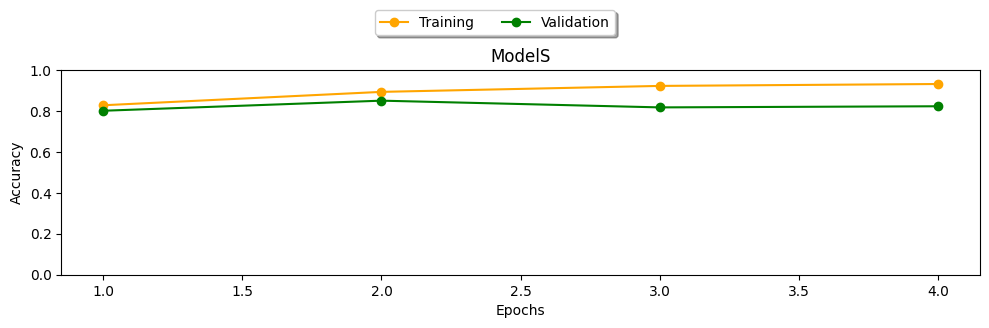

In [102]:
# # Example data
epochs = [i for i in range(1, num_epochs+1)]
#jk
train_loss_1 = train_acc
val_loss_1 = val_acc

# Create three subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plot for Model 1
axes.plot(epochs, train_loss_1, label='Training Loss',color='orange', linestyle='-', 
             marker='o')
axes.plot(epochs, val_loss_1, label='Validation Loss', color='green', linestyle='-', 
             marker='o')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.set_title('ModelS')
axes.set_ylim([0, 1])

# Add legend at the top
legend_labels = ['Training', 'Validation']
fig.legend(legend_labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.10), ncol=2, fancybox=True, shadow=True)



# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3> 4.2 Custom Test Function  </h3>
</div>

In [103]:
def custom_test_up(text):
    '''
    Return the Model Prediction of a given summary.
    '''
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=512)
    tf_outputs = model(inputs)
    tf_predictions = np.argmax(tf.nn.softmax(tf_outputs[0], axis=-1))
    return tf_predictions

In [104]:
valid_df.head(3)

,text,label
316,অভিশাপ উপন্যাসের মুল চরিত্র মালা সচ্ছ মধ্যবিত্...,0
296,"আকাশ ছোঁয়া স্বপ্ন দেখো ফ্ল্যাপের কথাঃএতোয়া, দ...",6
404,সৌরজগত থেকে দুই আলোকবর্ষ দূরের গোলাপী আর লাল...,4


In [105]:
tqdm.pandas()
valid_df['prediction'] = valid_df.text.progress_apply(custom_test_up)

100%|██████████| 182/182 [00:36<00:00,  5.01it/s]


In [106]:
y_true = valid_df['label'].values
y_pred = valid_df['prediction'].values

In [107]:
break_cond = 0
emergency_break = 5
for i ,j ,k in zip(valid_df['label'] , valid_df['prediction'],valid_df['text']):
    if i!=j:
        # Wrong Predictions
        print("Label\t","prediction\t","Text")
        print(genre_df.Genre[i],"\t",genre_df.Genre[j],"\t",k)
        print('....---------------------.....')
        break_cond += 1
    if break_cond == emergency_break:
        break

Label	 prediction	 Text
Motivational 	 Childrens-Book 	 আকাশ ছোঁয়া স্বপ্ন দেখো ফ্ল্যাপের কথাঃএতোয়া, দুখন, মাংরা, বুধনি, সুখী। ওরা আদিবাসী। ছোটনাগপুরের এক রুখুসুখু গ্রামে ওদের বসতি। সে গ্রাম জলবিহীন, নদী নেই। বৃষ্টি হয় খুব সামান্য। মাটিও তেমন উর্বর নয়। এতোয়াদের জীবন চলে অতি কষ্টে, ভয়ংকর দারিদ্রে। এক গ্রীষ্মের দাবদাহে স্থানীয় মহাজন লালমোহন তেলি তাদের স্বপ্ন দেখাল এক সোনার দেশের যেখানে জল আর খাবার অফুরন্ত। দয়ালু ইংরেজ রাজা তাদের সেখানে নিয়ে যেতে চায়। একটু ভালভাবে বেঁচে থাকার আশায় যেতে রাজি হল সেই গ্রামের মানুষ। আসলে জোয়ান নারীপুরুষ তাদের শিশুদের সঙ্গে নিয়ে ওয়াগন ভর্তি হয়ে চালান হয়ে গেল ডুয়ার্সে। চা বাগানের কুলির কাজে। সেখানে ধর্মান্তরিত হয়ে বুধনিরা হয়ে গেল যিশুবাবার সেবক। গাঁওবুড়োর বউ সুখীর নাম হয়ে গেল সুসান। প্ল্যান্টার হেগসাহেবের রক্ষিতা হতে হল তাকে। বাঘ, সাপ আর চাবুকের সামনে দুখনদের ক্রীতদাসের জীবন। সেখানে পদে পদে অসুখ, মৃত্যু আর তারই মধ্যে বেঁচে থাকার স্বপ্ন। এরই মধ্যে একটি অবৈধ সন্তানের জন্ম দিতে গিয়ে মারা গেল সুখী। শ্বেতাঙ্গ এই সন্তানটির পিতা কে? চা-বাগানের চার্চ

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3> 4.3 Confusion Matrix </h3>
</div>

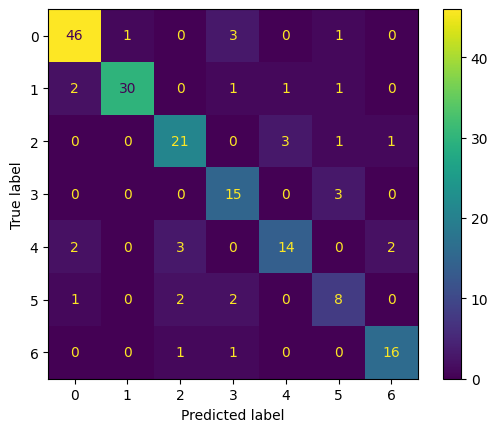

In [108]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6])

cm_display.plot()
plt.show()

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.8241758241758241

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3> 4.4 Classification Report  </h3>
</div>

In [110]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True)

cr_df = pd.DataFrame(report).transpose()
cr_df = cr_df.round(2)
cr_df

,precision,recall,f1-score,support
0,0.90,0.90,0.90,51.00
1,0.97,0.86,0.91,35.00
2,0.78,0.81,0.79,26.00
3,0.68,0.83,0.75,18.00
4,0.78,0.67,0.72,21.00
5,0.57,0.62,0.59,13.00
6,0.84,0.89,0.86,18.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.79,0.80,0.79,182.00
weighted avg,0.83,0.82,0.83,182.00


<div style="background-color: lightgreen; padding: 15px; border-radius: 5px; margin-bottom: 10px;">

<h3>Section 5: TESTING</h3>

<ol>
    <li>Predicting On the Test Set</li>
</ol>

</div>

In [111]:
test.head()

,Id,summary,text,length,length2,wptext,wswtext
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,367,369,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,উপন্যাস তখনি ভাল লাগে যখন চরিত্র গুলো কে বুঝতে...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,438,440,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,98,96,বাংলাদেশ আমার জন্মভূমি সাতপুরুষের ভিটেমাটি আজও...,বাংলাদেশ জন্মভূমি। সাতপুরুষের ভিটে-মাটি। আজও জ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,158,159,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...,20,19,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...,"সুন্দর অসাধারণ মধ্যবিত্ত পরিবারের সুখ, দু খ, আ..."


In [112]:
# def custom_test_up(text):
#     inputs=tokenizer(text,return_tensors="tf", truncation=True, padding=True, max_length=512)
#     tf_outputs = model(inputs)                                  
#     tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
   
#     return tf_predictions

<div style="text-align: center; background-color: orange; padding: 20px;">
    <h3> 5.1 Predicting On the Test Set  </h3>
</div>

In [113]:
tqdm.pandas()
test['pred'] = test.text.progress_apply(custom_test_up)

100%|██████████| 687/687 [02:22<00:00,  4.81it/s]


In [114]:
test.head()

,Id,summary,text,length,length2,wptext,wswtext,pred
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,367,369,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,উপন্যাস তখনি ভাল লাগে যখন চরিত্র গুলো কে বুঝতে...,0
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,438,440,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,বইঃ দ্য সান অফ লাইট রামেসিস 1 লেখকঃ ক্রিশ্চিয়...,1
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,98,96,বাংলাদেশ আমার জন্মভূমি সাতপুরুষের ভিটেমাটি আজও...,বাংলাদেশ জন্মভূমি। সাতপুরুষের ভিটে-মাটি। আজও জ...,0
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,158,159,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,0
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...,20,19,অনেক সুন্দর এবং অসাধারণ একটি বই মধ্যবিত্ত পরিব...,"সুন্দর অসাধারণ মধ্যবিত্ত পরিবারের সুখ, দু খ, আ...",0


In [115]:
ri = random.randint(0, len(test))

print(f'Prediction = {test.pred[ri]}, {genre_df.Genre[test.pred[ri]]}')
print(test.text[ri])

Prediction = 3, Political
মোটাদাগে তিনি ছিলেন একজন স্বশিক্ষিত লোক। ছোটবেলায় যে স্কুলে তিনি পড়তে যেতেন সেখানে আশেপাশের আট দশ কিলোমিটারের মধ্যে লিংকনই ছিল একমাত্র ছাত্র। আনুষ্ঠানিক শিক্ষা ঐ অর্থে বেশি করতে পারেননি। বেশিরভাগই নিজে নিজে শিখেছেন। আমেরিকার সর্বকালের শ্রেষ্ঠ একজন রাষ্ট্রনায়ক হিসেবে গড়ে উঠার পেছনে তার আনুষ্ঠানিক শিক্ষার ভূমিকা খুব কমই!


<div style="text-align: center; background-color: lightblue; padding: 20px;">
    <h3>Thanks for reading My Notebook!</h3>
</div>
